# BANYAN probabilities for the MG candidates.
#### This program returns the probability of membership to the TW Hya moving group for a list of candidate members pre-selected from a large search of literature sources.
The input data is a table of positions, proper motions, parallaxes and radial velocities, where the first 3 are exclusively from Gaia DR3.

The radial velocities are from a Vizier catalogue search made using the Find_Vizier_RVs.ipynb and MultipleRVs.ipynb notebooks.

## IMPORTANT
To run the script, we need to follow the instruction's on Jonathan Gagne's github page.
https://github.com/jgagneastro/banyan_sigma

It is recommended to work in the virtual environment space, to ensure that all the requirements for the python modules are matched (see ./banyan_sigma/requirements.txt).

In [137]:
# import the modules
from banyan_sigma.core import *
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt

In [138]:
MG_test = 'TWA'
Table_Kin = ascii.read("../AO23/Volans/other_mgs/BANYAN_Input.csv")
Table_Kin = Table_Kin[Table_Kin["MG"] == MG_test]

In [139]:
Table_Kin = Table_Kin[Table_Kin.colnames[:-1]]
Table_Kin

target_ID,ra,dec,pmra,epmra,pmdec,epmdec,plx,eplx,rv,erv
str28,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Gaia DR3 5460240959050125568,153.0376440933743,-31.412609516028827,-78.51263350593804,0.0412492,-11.585749145235889,0.0580075,18.787173693776438,0.0637934,14.51,0.44
...,...,...,...,...,...,...,...,...,...,...
Gaia DR3 3560046856343264000,168.29269873424735,-15.066936042210095,--,--,--,--,--,--,--,--
Gaia DR3 5376866126187641216,169.80405076384864,-43.71108201714018,-49.77749056746427,0.436218,6.454884172518398,0.379242,6.362996912063791,0.441784,--,--


In [140]:
BANYAN_Probs = []
for t in Table_Kin:
    if isinstance(t["pmra"], np.ma.core.MaskedConstant):
        print('nope')
        BANYAN_Probs.append(0.0)
    else:
        str_comm=''
        for c in t.colnames[1:]:
            if not isinstance(t[c], np.ma.core.MaskedConstant):
                str_comm += f'{c}=t["{c}"],'
        if not isinstance(t['plx'], np.ma.core.MaskedConstant):
            str_comm += 'use_plx=True,'
        else:
            str_comm += 'use_plx=False,'
        if not isinstance(t['rv'], np.ma.core.MaskedConstant):
            str_comm += 'use_rv=True,'
        else:
            str_comm += 'use_rv=False,'
        str_comm = str_comm[0:-1]
        output = eval('membership_probability(' + str_comm +')')
        print(t["target_ID"], output['ALL'].iloc[0][f'{MG_test}'])
        BANYAN_Probs.append(output['ALL'].iloc[0][f'{MG_test}'])

Gaia DR3 5460240959050125568 0.9542829300821045
Gaia DR3 5396978667757576064 0.11288275753882973
nope
Gaia DR3 6153319453646631040 2.899044594201269e-32
Gaia DR3 6159597046565457280 1.823754441863763e-109
Gaia DR3 2997233585961825280 5.038780000150455e-62
Gaia DR3 654704237414120192 7.217228806363464e-07
Gaia DR3 654704237415844736 0.00029698185312149406
Gaia DR3 5734132118729087488 9.322803754075309e-25
Gaia DR3 5632746396349003136 8.44586535532961e-13
Gaia DR3 3769934860057100672 0.00026782784269418315
Gaia DR3 5460240959047928832 0.9913947738004926
Gaia DR3 5356713413789909632 4.2451415474771e-12
Gaia DR3 5355751581627180288 2.8426261293206347e-12
Gaia DR3 5460728077057780864 4.752051551541417e-09
Gaia DR3 5416221633076680320 1.134702552641284e-09
Gaia DR3 5416606290347735040 1.1220156943785936e-06
Gaia DR3 5467714064704570112 0.9595920636701768
Gaia DR3 5442055758282776832 1.4273324357079762e-49
Gaia DR3 5444361399801533312 1.617697109958296e-07
Gaia DR3 5444751795151480320 0.97716

48


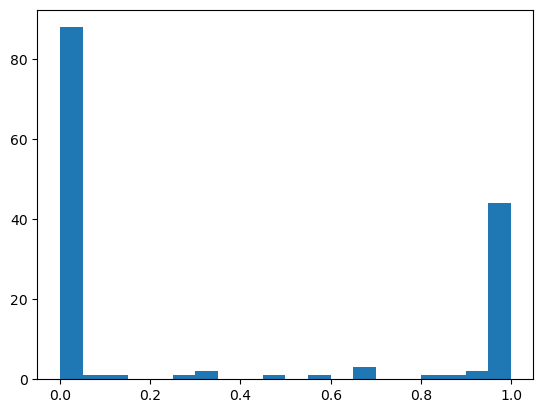

In [141]:
Table_Kin["BANYAN"] = BANYAN_Probs
plt.hist(Table_Kin["BANYAN"],bins=20)
print(np.sum(Table_Kin["BANYAN"] >= 0.8))

In [142]:
Table_Kin.write(f"BANYAN_Probs_{MG_test}.csv", overwrite=True)